In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv(r"D:\New folder\archive\gym_members_exercise_tracking.csv")

In [120]:
dataset.head(600)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,49,88.6,2.00,162,127,56,1.83,1150.0,14.9,3.5,4,3,22.15
596,38,49.7,1.51,179,145,65,1.25,906.0,32.6,2.5,3,1,21.80
597,33,56.4,1.54,165,155,63,1.06,822.0,29.2,1.5,3,1,23.78
598,38,46.9,1.74,198,167,64,1.03,946.0,20.0,2.6,4,2,15.49


In [4]:
dataset.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

In [5]:
en_data=dataset[["Gender"]]

In [6]:
pd.get_dummies(en_data)

,Gender_Female,Gender_Male
0,False,True
1,True,False
2,True,False
3,False,True
4,False,True
...,...,...
968,False,True
969,False,True
970,True,False
971,False,True


In [20]:
dataset.drop(columns=["Gender","Workout_Type"],inplace=True)

In [106]:
dataset.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39


In [32]:
x=dataset.iloc[:,:-1].values

In [33]:
y=dataset.iloc[:,-1].values

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()

In [40]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
y_pred=model.predict(x_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
mse=mean_squared_error(y_test,y_pred)

In [46]:
r2=r2_score(y_test,y_pred)

In [47]:
print(mse)

0.6933694281470214


In [48]:
print(r2)

0.9849631597690078


In [55]:
import joblib

In [56]:
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved!")

Model saved!


In [57]:
import matplotlib.pyplot as plt

In [60]:
print(len(x), len(y))


973 973


In [66]:
import numpy as np

# Check for NaN values in x and y
print(np.isnan(x).sum())  # Count NaNs in x
print(np.isnan(y).sum())  # Count NaNs in y


0
0


In [118]:
x_single = x[:, 11] 


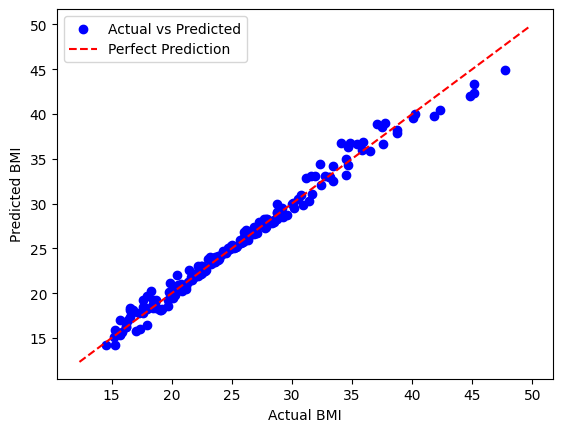

In [119]:
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.legend()
plt.show()

In [108]:
loaded_model = joblib.load('linear_regression_model.pkl')

In [113]:
new_data = pd.DataFrame({
    'Age': [35, 50],
    'Weight (kg)': [70, 85],
    'Height (m)': [1.65, 1.80],
    'Max_BPM': [175, 180],
    'Avg_BPM': [150, 155],
    'Resting_BPM': [65, 70],
    'Session_Duration (hours)': [1.5, 1.8],
    'Calories_Burned': [1000, 1200],
    'Fat_Percentage': [20.0, 25.0],
    'Water_Intake (liters)': [2.5, 3.0],
    'Workout_Frequency (days/week)': [3, 4],
    'Experience_Level': [2, 3]
})

# Predicting BMI values for new data
predicted_bmi = loaded_model.predict(new_data)

# Printing the predicted BMI values
print(predicted_bmi)

[25.28319988 26.04575092]


C:\Users\ssbih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
